<a href="https://colab.research.google.com/github/NaveedDB7/EDAcourseproj/blob/main/edaproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Naveed Noushad (22BDS0083)
# BCSE331L - Exploratory Data Analysis
# Dataset: CreditCard.csv


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("seaborn-v0_8")


In [ ]:
# 1. Load data

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/CreditCard.csv"
df = pd.read_csv(url)

print("✅ Data loaded")
print("Shape:", df.shape)
print(df.head())


# 2. Basic info

print("\nInfo:")
print(df.info())

print("\nSummary (numeric):")
print(df.describe())

print("\nSummary (categorical):")
print(df.describe(include="object"))


# 3. Data quality

print("\nMissing values:")
print(df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
df = df.fillna(method="ffill")


# 4. Data types

print("\nData types:")
print(df.dtypes)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

✅ Data loaded
Shape: (1319, 13)
   rownames card  reports       age  income     share  expenditure owner  \
0         1  yes        0  37.66667  4.5200  0.033270   124.983300   yes   
1         2  yes        0  33.25000  2.4200  0.005217     9.854167    no   
2         3  yes        0  33.66667  4.5000  0.004156    15.000000   yes   
3         4  yes        0  30.50000  2.5400  0.065214   137.869200    no   
4         5  yes        0  32.16667  9.7867  0.067051   546.503300   yes   

  selfemp  dependents  months  majorcards  active  
0      no           3      54           1      12  
1      no           3      34           1      13  
2      no           4      58           1       5  
3      no           0      25           1       7  
4      no           2      64           1       5  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

/tmp/ipython-input-3233631300.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [ ]:
# Check for missing values
df.isna().sum()
df.isna().any().any()

# Count of missing vs non-missing (naniar equivalent)
missing_counts = df.isna().sum().reset_index()
missing_counts.columns = ["column", "n_missing"]
print(missing_counts)

# Total missing values
print("Total missing:", df.isna().sum().sum())

#  Row-wise deletion of missing values
df_cleaned = df.dropna()
print(df_cleaned.shape)

#  For numerical columns, compute mean, median, std, min, max, quartiles
num_cols = df_cleaned.select_dtypes(include="number")
stats = num_cols.agg(["mean","median","std","min","max","quantile"])
print(stats)

# Measures of central tendency for 'income'
income = df["income"]
print("Mean:", income.mean())
print("Median:", income.median())
print("Mode:", income.mode()[0])

# Measures of dispersion for 'income'
print("Std Dev:", income.std())
print("Variance:", income.var())
print("Range:", income.max()-income.min())
print("IQR:", income.quantile(0.75) - income.quantile(0.25))

         column  n_missing
0      rownames          0
1          card          0
2       reports          0
3           age          0
4        income          0
5         share          0
6   expenditure          0
7         owner          0
8       selfemp          0
9    dependents          0
10       months          0
11   majorcards          0
12       active          0
Total missing: 0
(1319, 13)
             rownames    reports        age     income     share  expenditure  \
mean       660.000000   0.456406  33.213103   3.365376  0.068732   185.057071   
median     660.000000   0.000000  31.250000   2.900000  0.038827   101.298300   
std        380.906813   1.345267  10.142783   1.693902  0.094656   272.218917   
min          1.000000   0.000000   0.166667   0.210000  0.000109     0.000000   
max       1319.000000  14.000000  83.500000  13.500000  0.906320  3099.505000   
quantile   660.000000   0.000000  31.250000   2.900000  0.038827   101.298300   

          dependents      

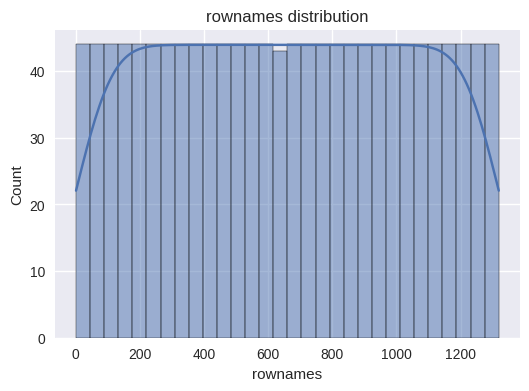

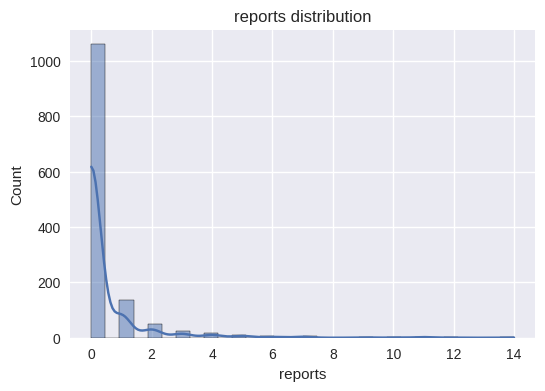

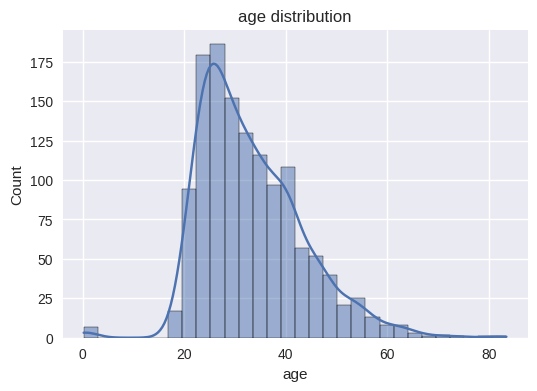

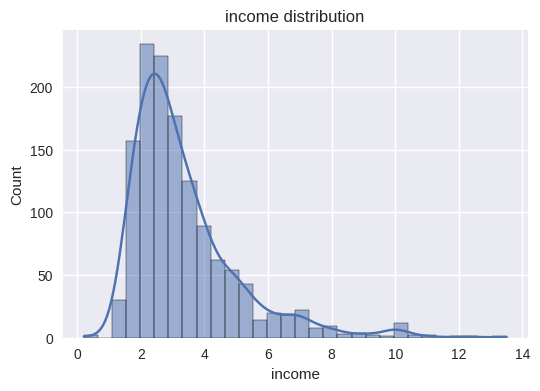

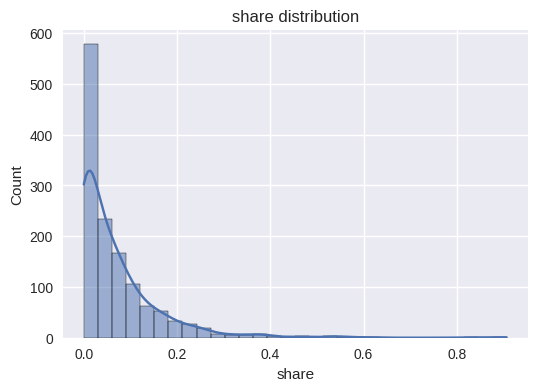

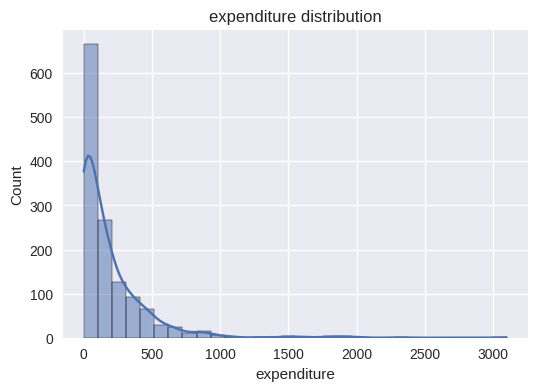

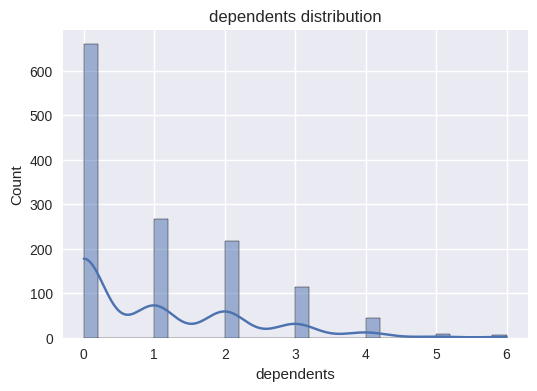

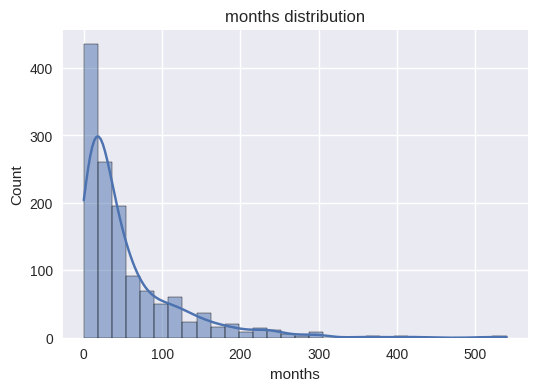

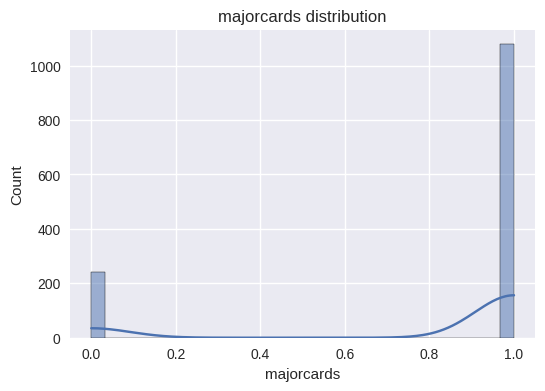

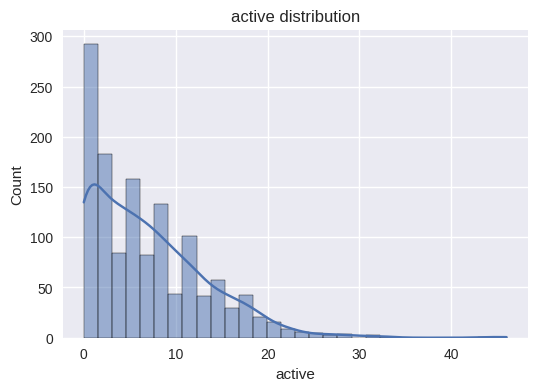

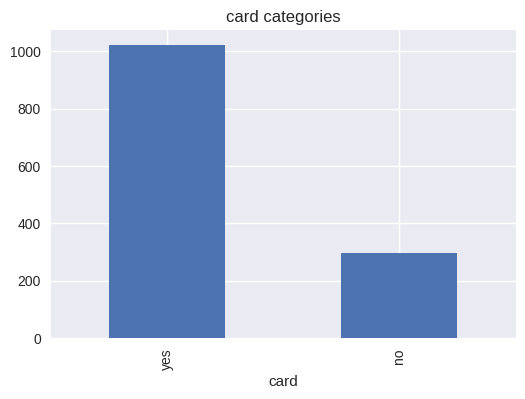

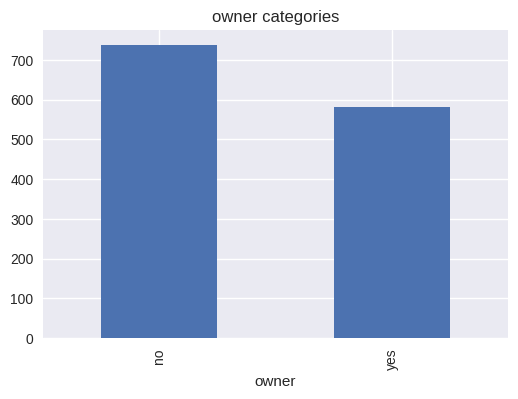

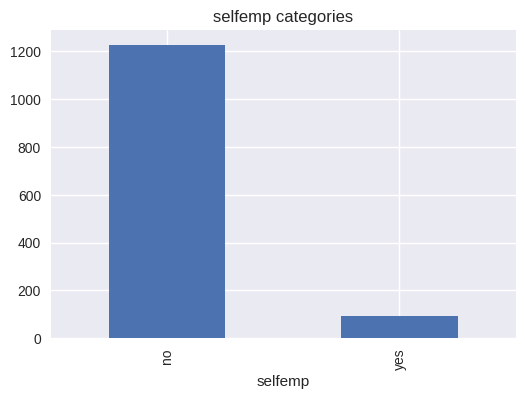

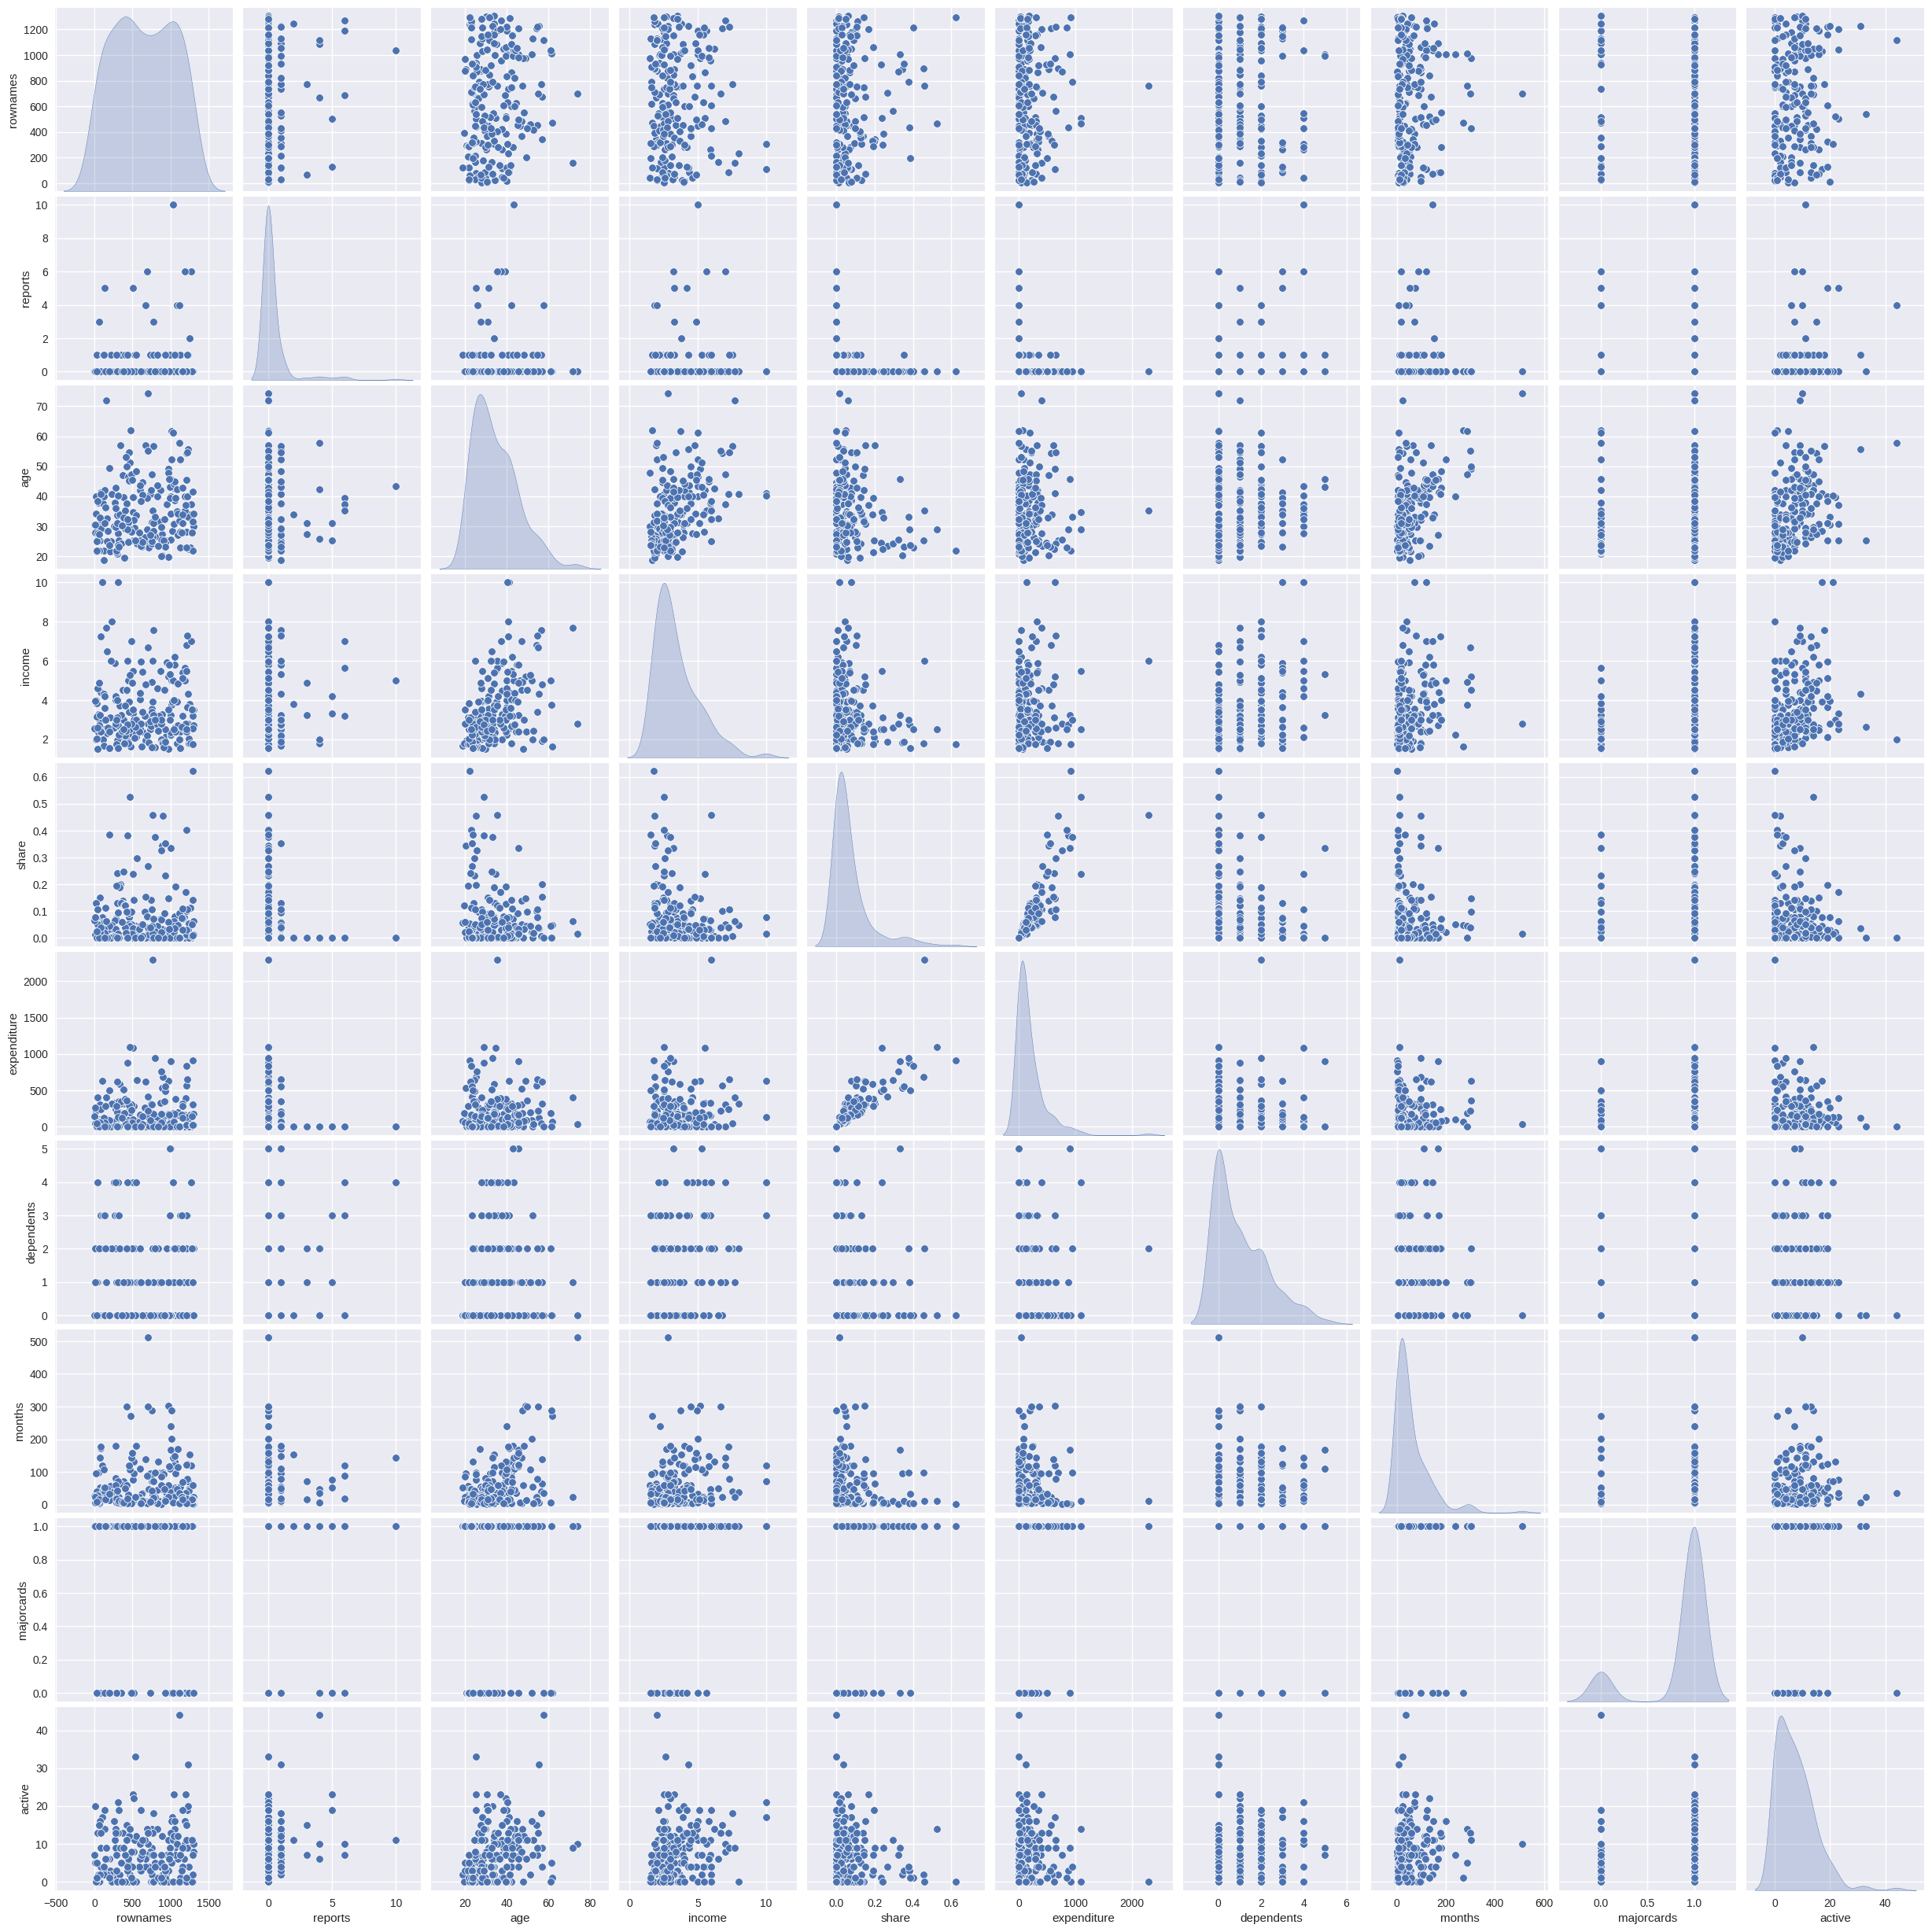


✅ Final shape: (1319, 13)


In [ ]:

# 5. Univariate analysis

for col in num_cols[:5]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} distribution")
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} categories")
    plt.show()


# 6. Bivariate analysis

if "Amount" in df.columns and "Class" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Class", y="Amount", data=df)
    plt.title("Amount by Class")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.scatterplot(x="Amount", y="Class", data=df, alpha=0.5)
    plt.title("Amount vs Class")
    plt.show()




# 8. Multivariate

sns.pairplot(df.sample(min(200, len(df))), diag_kind="kde")
plt.show()


# 9. Time column

if "Time" in df.columns:
    df["Time"] = pd.to_datetime(df["Time"], errors="coerce", unit="s")
    df.set_index("Time", inplace=True)
    df["Amount"].resample("D").sum().plot(figsize=(12,5))
    plt.title("Daily transaction totals")
    plt.show()


# 10. Contingency table

if {"Gender","Class"}.issubset(df.columns):
    print("\nGender vs Class")
    print(pd.crosstab(df["Gender"], df["Class"]))


# 11. Final

print("\n✅ Final shape:", df.shape)

Correlation income vs expenditure: 0.2811040182177777


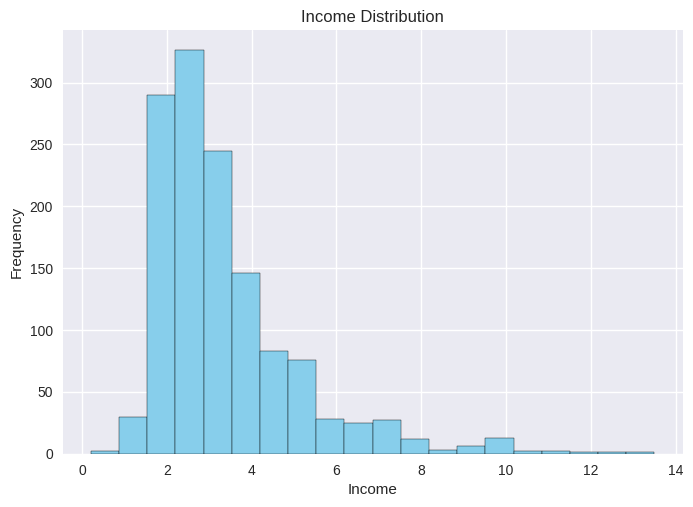

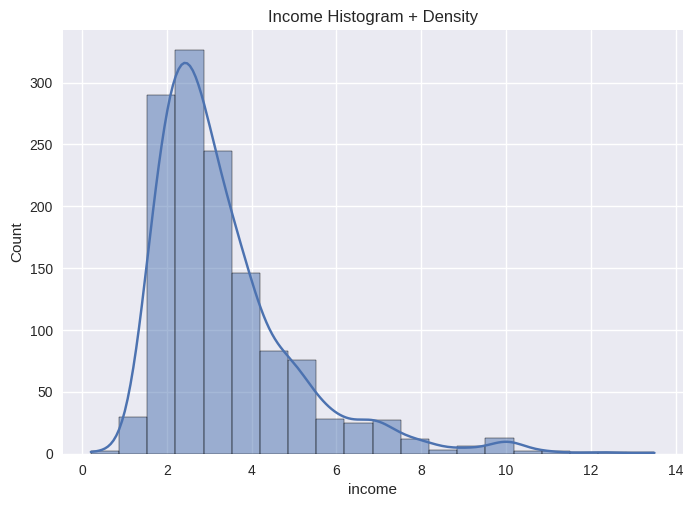

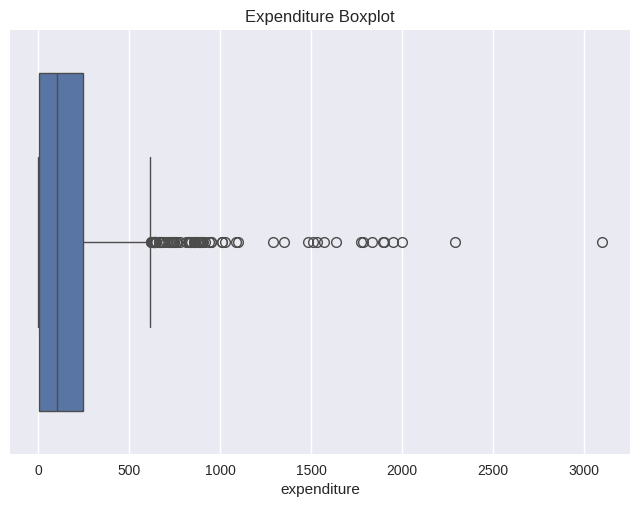

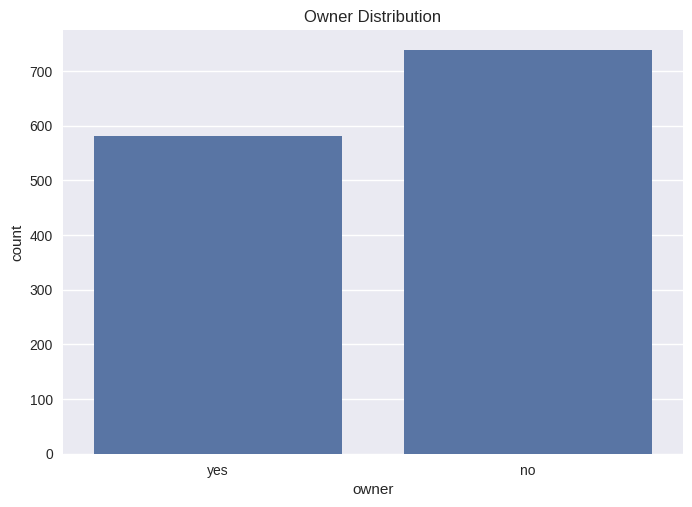

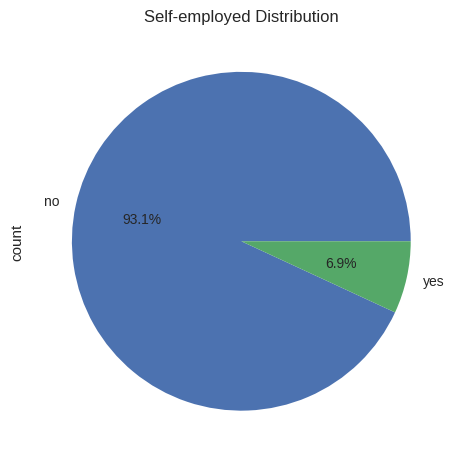

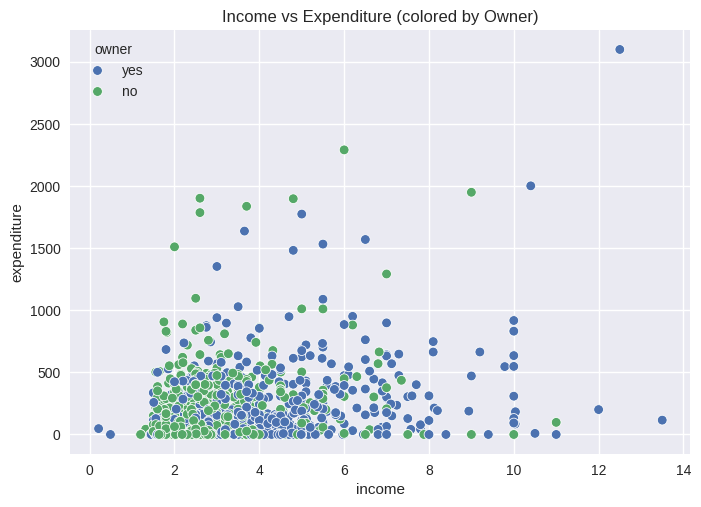

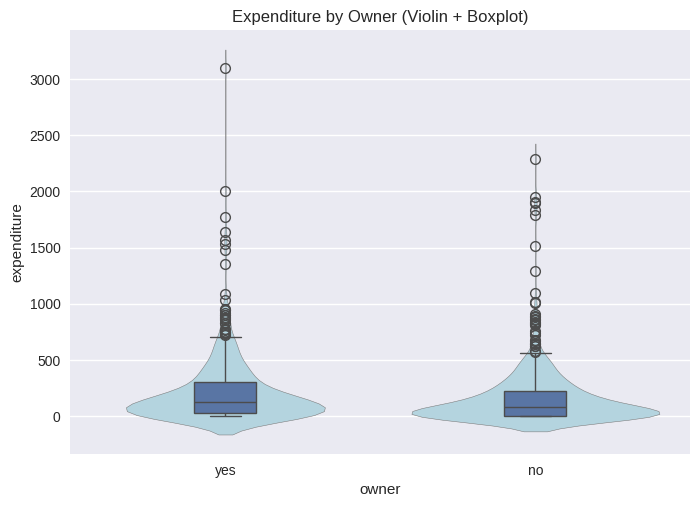

In [ ]:
#  Correlation between two numeric variables
print("Correlation income vs expenditure:", df["income"].corr(df["expenditure"]))

#  Histogram and density plot for 'income'
plt.hist(df["income"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()

sns.histplot(df["income"], kde=True, bins=20)
plt.title("Income Histogram + Density")
plt.show()

#  Box plot for 'expenditure'
sns.boxplot(x=df["expenditure"])
plt.title("Expenditure Boxplot")
plt.show()

#  Bar plot of categorical variable
sns.countplot(x="owner", data=df)
plt.title("Owner Distribution")
plt.show()

#  Pie chart for 'selfemp'
df["selfemp"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Self-employed Distribution")
plt.show()

#  Scatter plot: income vs expenditure
sns.scatterplot(x="income", y="expenditure", hue="owner", data=df)
plt.title("Income vs Expenditure (colored by Owner)")
plt.show()

#  Violin + Box plot together
sns.violinplot(x="owner", y="expenditure", data=df, inner=None, color="lightblue")
sns.boxplot(x="owner", y="expenditure", data=df, width=0.2, boxprops={"zorder": 2})
plt.title("Expenditure by Owner (Violin + Boxplot)")
plt.show()


Skewness:
 rownames       0.000000
reports        4.878665
age            0.840471
income         1.925892
share          3.164003
expenditure    3.716089
dependents     1.232871
months         2.567381
majorcards    -1.642130
active         1.211985
dtype: float64

Quantiles:
       rownames  reports        age    income     share  expenditure  \
0.00       1.0      0.0   0.166667   0.21000  0.000109     0.000000   
0.25     330.5      0.0  25.416670   2.24375  0.002316     4.583333   
0.50     660.0      0.0  31.250000   2.90000  0.038827   101.298300   
0.75     989.5      0.0  39.416670   4.00000  0.093617   249.035800   
1.00    1319.0     14.0  83.500000  13.50000  0.906320  3099.505000   

      dependents  months  majorcards  active  
0.00         0.0     0.0         0.0     0.0  
0.25         0.0    12.0         1.0     2.0  
0.50         1.0    30.0         1.0     6.0  
0.75         2.0    72.0         1.0    11.0  
1.00         6.0   540.0         1.0    46.0  

Frequency d

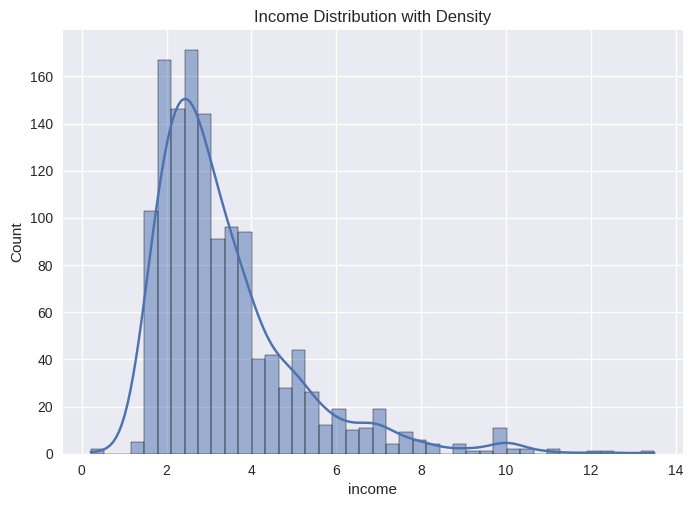

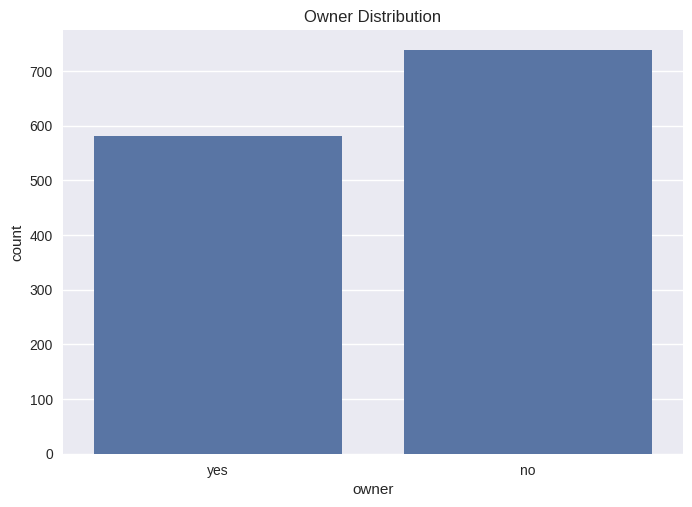

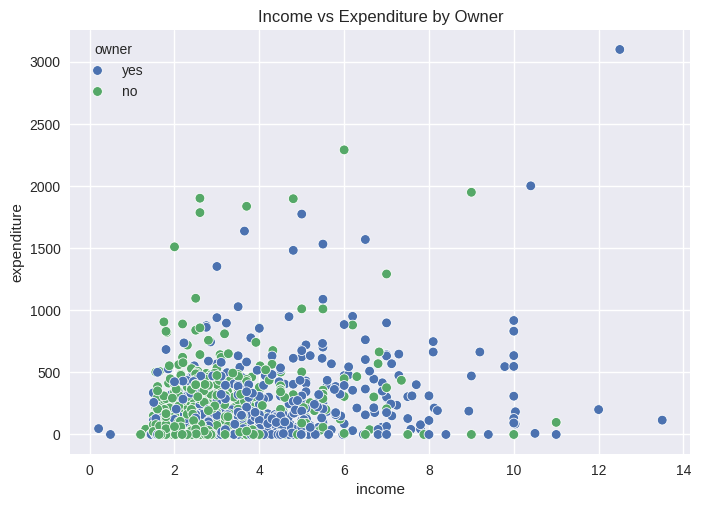

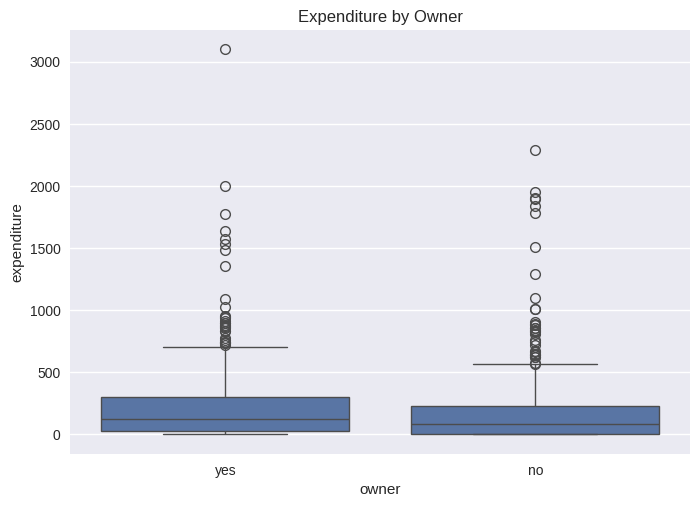

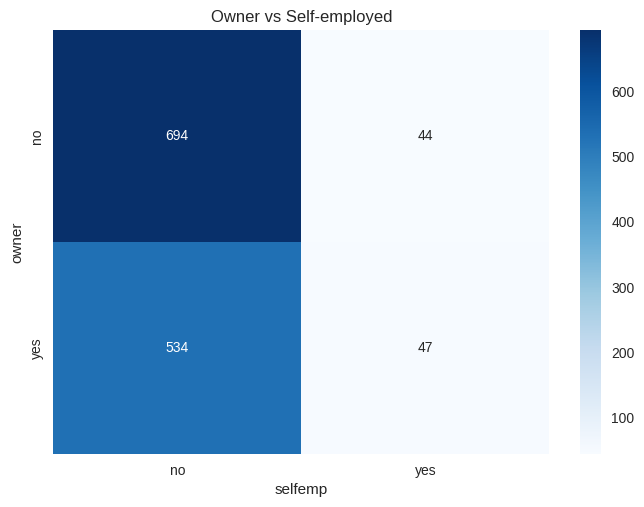

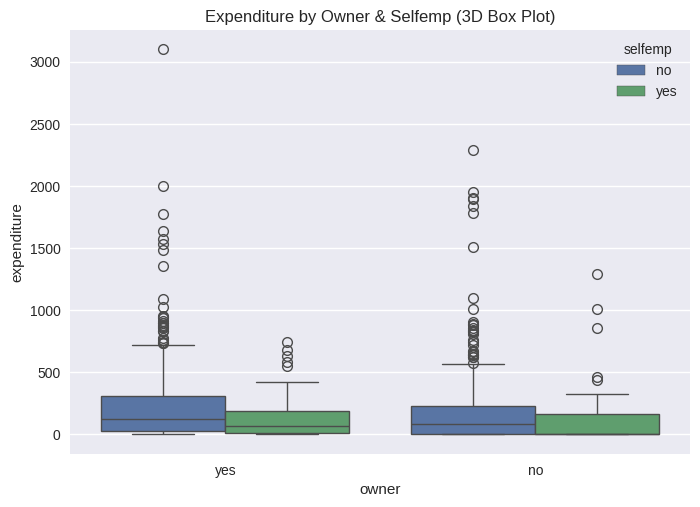

In [ ]:
# Module 4 - 1D Analysis
num_cols = df.select_dtypes(include="number")
skewness = num_cols.apply(skew)
print("Skewness:\n", skewness)

quantiles = num_cols.quantile([0, 0.25, 0.5, 0.75, 1])
print("\nQuantiles:\n", quantiles)

for col in ["owner", "selfemp"]:
    print(f"\nFrequency distribution of {col}:")
    print(df[col].value_counts())

sns.histplot(df["income"], kde=True)
plt.title("Income Distribution with Density")
plt.show()

sns.countplot(x="owner", data=df)
plt.title("Owner Distribution")
plt.show()

#  2D Analysis
sns.scatterplot(data=df,x="income", y="expenditure", hue="owner")
plt.title("Income vs Expenditure by Owner")
plt.show()

sns.boxplot(data=df,x="owner", y="expenditure")
plt.title("Expenditure by Owner")
plt.show()

crosstab = pd.crosstab(df["owner"], df["selfemp"])
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d")
plt.title("Owner vs Self-employed")
plt.show()

#  3D Analysis
sns.boxplot(x="owner", y="expenditure", hue="selfemp", data=df)
plt.title("Expenditure by Owner & Selfemp (3D Box Plot)")
plt.show()


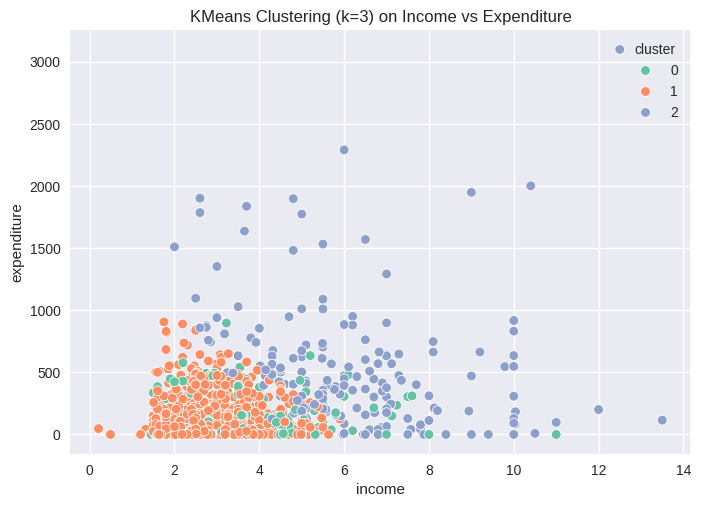

Cluster sizes:
 cluster
1    956
0    188
2    175
Name: count, dtype: int64


In [ ]:
# Module 5 - Clustering (KMeans on numerical features)
X = df[["income", "expenditure", "months", "active"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

sns.scatterplot(data=df,x="income", y="expenditure", hue=df["cluster"], palette="Set2")
plt.title("KMeans Clustering (k=3) on Income vs Expenditure")
plt.show()

print("Cluster sizes:\n", df["cluster"].value_counts())
